In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
# Load the training data
file_path = "/content/drive/MyDrive/2nd semester/training_processed.xlsx"
xls = pd.ExcelFile(file_path)

# Check available sheet names
xls.sheet_names


['Sheet1']

In [3]:
# Load the first sheet into a DataFrame
df = pd.read_excel(xls, sheet_name='Sheet1')

# Display the first few rows to understand the structure
df.head()


,Date,Vehicle Category,GVWR Class,Fuel Type,Model Year,Fuel Technology,Electric Mile Range,Number of Vehicles Registered at the Same Address,Region,Vehicle Population
0,2019,5,8,2,2020.0,2,4,4,0,395883
1,2020,5,8,2,2020.0,2,4,1,0,370954
2,2021,5,8,2,2020.0,2,4,1,0,349406
3,2019,5,8,2,2019.0,2,4,4,0,348475
4,2019,5,8,2,2018.0,2,4,6,0,333296


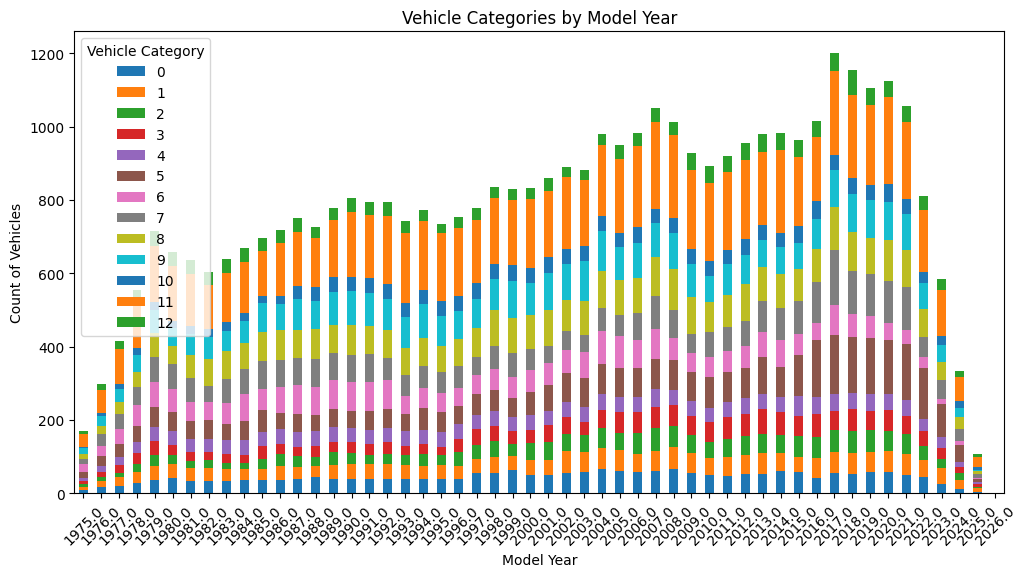

In [4]:
import matplotlib.pyplot as plt

# Group data by Vehicle Category and Model Year
vehicle_category_year = df.groupby(['Model Year', 'Vehicle Category']).size().unstack()

# Plot the data
vehicle_category_year.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.xlabel("Model Year")
plt.ylabel("Count of Vehicles")
plt.title("Vehicle Categories by Model Year")
plt.xticks(rotation=45)
plt.legend(title="Vehicle Category")

# Display the plot
plt.show()


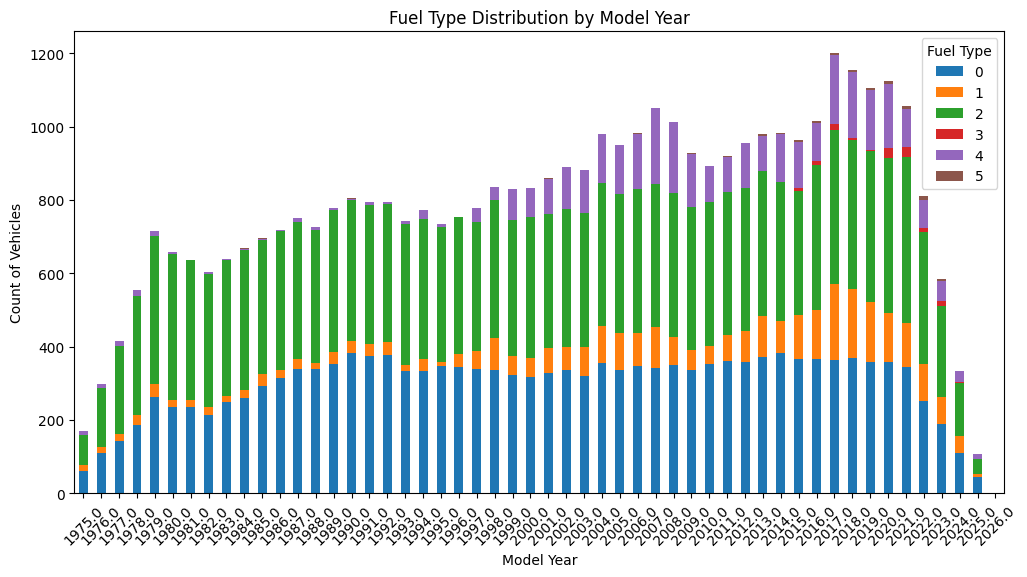

In [5]:
# Group data by Fuel Type and Model Year
fuel_type_year = df.groupby(['Model Year', 'Fuel Type']).size().unstack()

# Plot the data
fuel_type_year.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.xlabel("Model Year")
plt.ylabel("Count of Vehicles")
plt.title("Fuel Type Distribution by Model Year")
plt.xticks(rotation=45)
plt.legend(title="Fuel Type")

# Display the plot
plt.show()


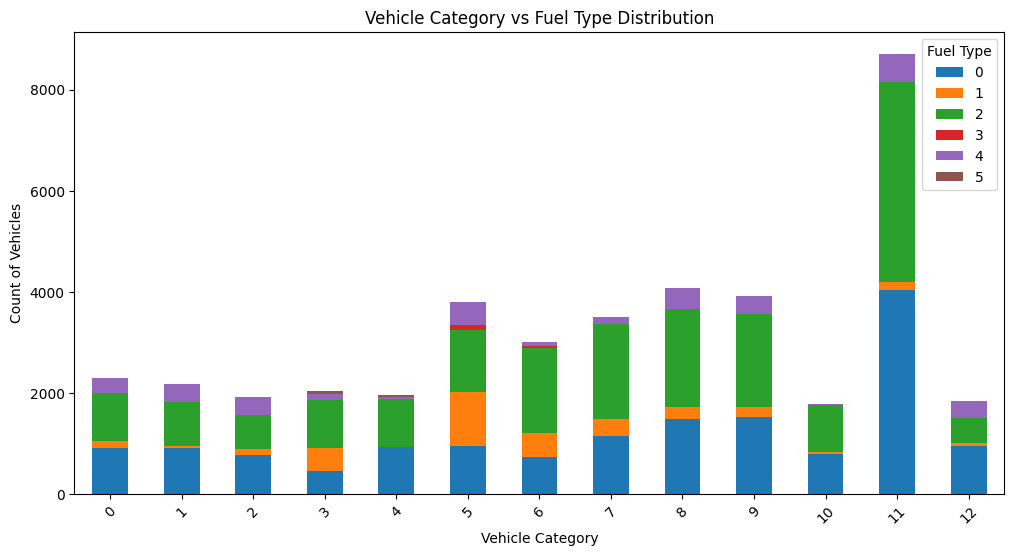

In [6]:
# Group data by Vehicle Category and Fuel Type
vehicle_fuel_type = df.groupby(['Vehicle Category', 'Fuel Type']).size().unstack()

# Plot the data
vehicle_fuel_type.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.xlabel("Vehicle Category")
plt.ylabel("Count of Vehicles")
plt.title("Vehicle Category vs Fuel Type Distribution")
plt.xticks(rotation=45)
plt.legend(title="Fuel Type")

# Display the plot
plt.show()


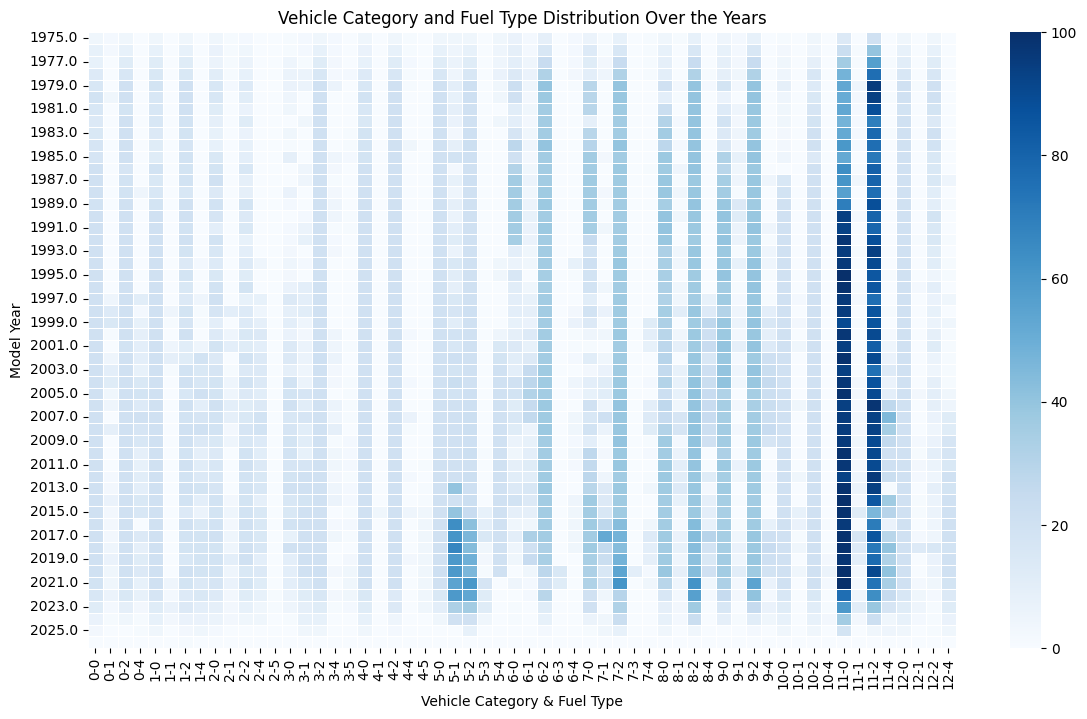

In [7]:
import seaborn as sns

# Create a pivot table for visualization
pivot_data = df.pivot_table(index="Model Year", columns=["Vehicle Category", "Fuel Type"], aggfunc="size", fill_value=0)

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_data, cmap="Blues", linewidths=0.5, annot=False)
plt.xlabel("Vehicle Category & Fuel Type")
plt.ylabel("Model Year")
plt.title("Vehicle Category and Fuel Type Distribution Over the Years")

# Display the plot
plt.show()


In [ ]:
# Load the first sheet into a DataFrame
df = pd.read_excel(xls, sheet_name='Sheet1')

# Display basic information about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41053 entries, 0 to 41052
Data columns (total 10 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Date                                               41053 non-null  int64  
 1   Vehicle Category                                   41053 non-null  int64  
 2   GVWR Class                                         41053 non-null  int64  
 3   Fuel Type                                          41053 non-null  int64  
 4   Model Year                                         40450 non-null  float64
 5   Fuel Technology                                    41053 non-null  int64  
 6   Electric Mile Range                                41053 non-null  int64  
 7   Number of Vehicles Registered at the Same Address  41053 non-null  int64  
 8   Region                                             41053 non-null  int64  
 9   Vehicl

(None,
    Date  Vehicle Category  GVWR Class  Fuel Type  Model Year  Fuel Technology  \
 0  2019                 5           8          2      2020.0                2   
 1  2020                 5           8          2      2020.0                2   
 2  2021                 5           8          2      2020.0                2   
 3  2019                 5           8          2      2019.0                2   
 4  2019                 5           8          2      2018.0                2   
 
    Electric Mile Range  Number of Vehicles Registered at the Same Address  \
 0                    4                                                  4   
 1                    4                                                  1   
 2                    4                                                  1   
 3                    4                                                  4   
 4                    4                                                  6   
 
    Region  Vehicle Populatio

In [ ]:
# Handling missing values in 'Model Year'
# filling the missing values
df['Model Year'].fillna(df['Model Year'].median(), inplace=True)

# Verify that missing values are handled
df.isnull().sum()


<ipython-input-7-7a3550643e70>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Model Year'].fillna(df['Model Year'].median(), inplace=True)


,0
Date,0
Vehicle Category,0
GVWR Class,0
Fuel Type,0
Model Year,0
Fuel Technology,0
Electric Mile Range,0
Number of Vehicles Registered at the Same Address,0
Region,0
Vehicle Population,0


In [ ]:

df = pd.read_excel(xls, sheet_name='Sheet1')

def clean_vehicle_registration(value):
    if value == "≥4":
        return np.random.randint(4, 7)
    elif value == "Unknown":
        return None
    else:
        try:
            return int(value)
        except ValueError:
            return None


df['Number of Vehicles Registered at the Same Address'] = df['Number of Vehicles Registered at the Same Address'].apply(clean_vehicle_registration)

# Replace missing values with median
median_value = int(df['Number of Vehicles Registered at the Same Address'].median())
df['Number of Vehicles Registered at the Same Address'].fillna(median_value, inplace=True)

df['Number of Vehicles Registered at the Same Address'].unique()


<ipython-input-8-22467f027ce7>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Number of Vehicles Registered at the Same Address'].fillna(median_value, inplace=True)


array([4, 1, 6, 5, 2, 3])

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Identify categorical columns
categorical_columns = ['Vehicle Category', 'GVWR Class', 'Fuel Type', 'Fuel Technology', 'Electric Mile Range', 'Region']

# Convert all categorical columns to string type to ensure uniformity
for col in categorical_columns:
    df[col] = df[col].astype(str)

# Apply Label Encoding
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])


df.head()


,Date,Vehicle Category,GVWR Class,Fuel Type,Model Year,Fuel Technology,Electric Mile Range,Number of Vehicles Registered at the Same Address,Region,Vehicle Population
0,2019,8,8,2,2020.0,2,4,4,0,395883
1,2020,8,8,2,2020.0,2,4,1,0,370954
2,2021,8,8,2,2020.0,2,4,1,0,349406
3,2019,8,8,2,2019.0,2,4,4,0,348475
4,2019,8,8,2,2018.0,2,4,6,0,333296


<ipython-input-15-f85b20da808b>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Model Year'].fillna(df['Model Year'].median(), inplace=True)
<ipython-input-15-f85b20da808b>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

                                             Feature  Importance
4                                         Model Year    0.282899
6                                Electric Mile Range    0.212879
3                                          Fuel Type    0.191785
1                                   Vehicle Category    0.146662
7  Number of Vehicles Registered at the Same Address    0.057185
0                                               Date    0.044983
5                                    Fuel Technology    0.040402
2                                         GVWR Class    0.023206
8                                             Region    0.000000


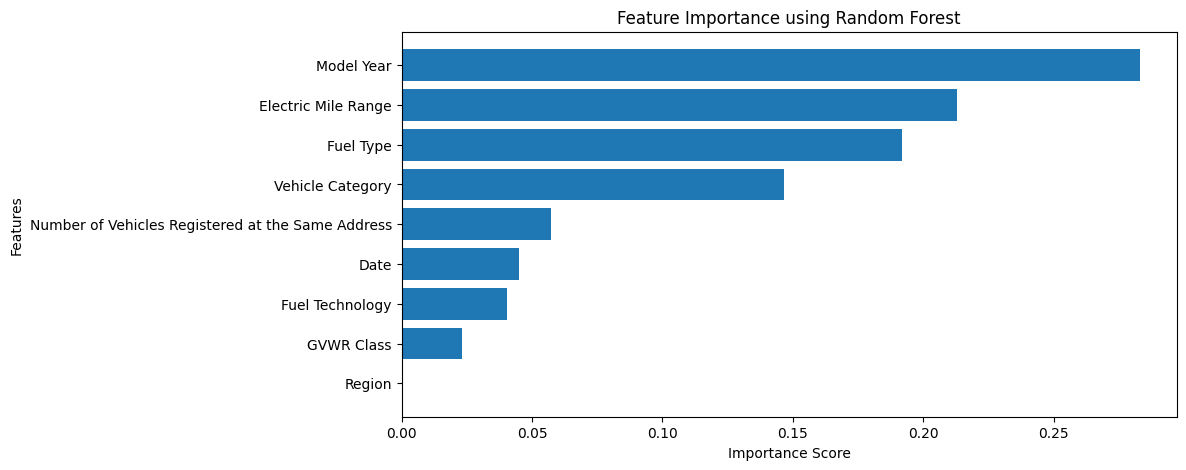

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

df['Model Year'].fillna(df['Model Year'].median(), inplace=True)


def clean_vehicle_registration(value):
    if value == "≥4":
        return np.random.randint(4, 7)
    elif value == "Unknown":
        return None
    else:
        try:
            return int(value)
        except ValueError:
            return None

df['Number of Vehicles Registered at the Same Address'] = df['Number of Vehicles Registered at the Same Address'].apply(clean_vehicle_registration)
df['Number of Vehicles Registered at the Same Address'].fillna(df['Number of Vehicles Registered at the Same Address'].median(), inplace=True)

# Encode categorical variablescategorical_columns = ['Vehicle Category', 'GVWR Class', 'Fuel Type', 'Fuel Technology', 'Electric Mile Range', 'Region']
label_encoders = {}

for col in categorical_columns:
    df[col] = df[col].astype(str)
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])


X = df.drop(columns=['Vehicle Population'])
y = df['Vehicle Population']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


assert not np.isnan(X_scaled).sum(), "There are NaN values in the features"
assert not np.isinf(X_scaled).sum(), "There are Inf values in the features"


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_scaled, y)


feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)


print(feature_importance)

plt.figure(figsize=(10, 5))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance using Random Forest')
plt.gca().invert_yaxis()
plt.show()


<ipython-input-19-b40071a0d8b2>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Model Year'].fillna(df['Model Year'].median(), inplace=True)
<ipython-input-19-b40071a0d8b2>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

Epoch 1/50
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0361 - mae: 0.1304 - val_loss: 0.0022 - val_mae: 0.0417
Epoch 2/50
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0060 - mae: 0.0478 - val_loss: 8.1644e-04 - val_mae: 0.0253
Epoch 3/50
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0037 - mae: 0.0326 - val_loss: 4.6181e-04 - val_mae: 0.0190
Epoch 4/50
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0029 - mae: 0.0263 - val_loss: 2.8023e-04 - val_mae: 0.0148
Epoch 5/50
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0029 - mae: 0.0232 - val_loss: 2.0405e-04 - val_mae: 0.0127
Epoch 6/50
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0028 - mae: 0.0213 - val_loss: 2.0298e-04 - val_mae: 0.0130
Epoch 7/50
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0026 - mae: 0.0198 - val_loss: 2.5509e-04 - val_mae: 0.0145
Epoch 8/50
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0025 - mae: 0.0191 - val_loss: 1.2980e-04 - val_mae: 0.0089
Epoch 9/50
1

ExactExplainer explainer: 41054it [23:08, 29.30it/s]                           


                                             Feature  Importance
1                                   Vehicle Category    0.008463
3                                          Fuel Type    0.008285
4                                         Model Year    0.005652
2                                         GVWR Class    0.003361
5                                    Fuel Technology    0.001000
6                                Electric Mile Range    0.000957
7  Number of Vehicles Registered at the Same Address    0.000855
0                                               Date    0.000632
8                                             Region    0.000000


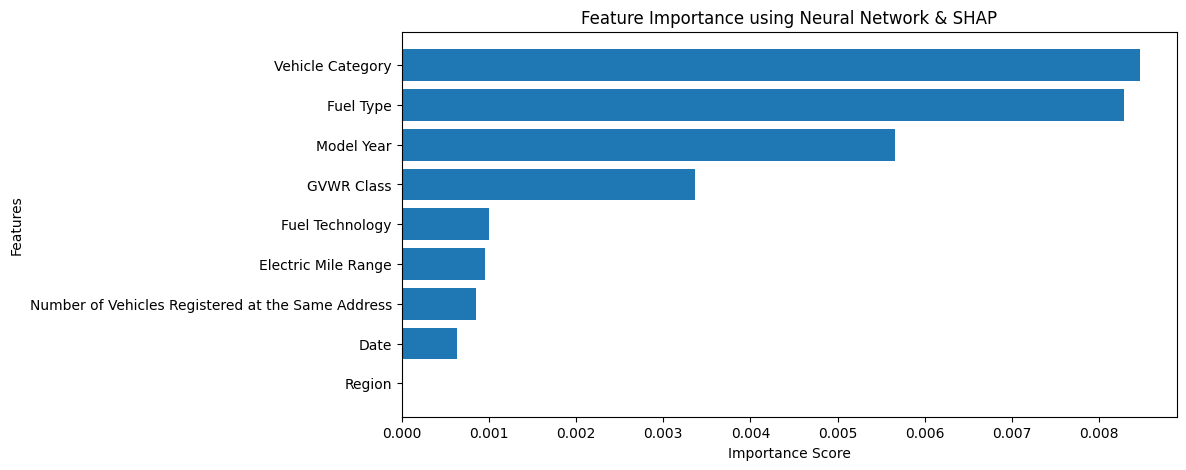

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import shap
import matplotlib.pyplot as plt


# Handling missing values in 'Model Year'
df['Model Year'].fillna(df['Model Year'].median(), inplace=True)


def clean_vehicle_registration(value):
    if value == "≥4":
        return np.random.randint(4, 7)
    elif value == "Unknown":
        return None
    else:
        try:
            return int(value)
        except ValueError:
            return None

df['Number of Vehicles Registered at the Same Address'] = df['Number of Vehicles Registered at the Same Address'].apply(clean_vehicle_registration)
df['Number of Vehicles Registered at the Same Address'].fillna(df['Number of Vehicles Registered at the Same Address'].median(), inplace=True)

# Encode categorical variables
categorical_columns = ['Vehicle Category', 'GVWR Class', 'Fuel Type', 'Fuel Technology', 'Electric Mile Range', 'Region']
label_encoders = {}

for col in categorical_columns:
    df[col] = df[col].astype(str)
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])


X = df.drop(columns=['Vehicle Population'])
y = df['Vehicle Population']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalize the target variable (y) using MinMaxScaler
y_scaler = MinMaxScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

# Ensure no NaN or Inf values exist
assert not np.isnan(X_scaled).sum(), "There are NaN values in the features"
assert not np.isinf(X_scaled).sum(), "There are Inf values in the features"

# Define the Neural Network Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_scaled, y_scaled, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Feature Importance using SHAP
explainer = shap.Explainer(model, X_scaled)
shap_values = explainer(X_scaled)

# Convert SHAP values into a summary dataframe
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='Importance', ascending=False)

# Display feature importance ranking
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance using Neural Network & SHAP')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming you have the true values (y) and predictions (y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 19071.657715049314


In [ ]:
# Re-import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Handling missing values in 'Model Year'
df['Model Year'].fillna(df['Model Year'].median(), inplace=True)

# Convert 'Number of Vehicles Registered at the Same Address'
def clean_vehicle_registration(value):
    if value == "≥4":
        return np.random.randint(4, 7)  # Assign a random value between 4 and 6
    elif value == "Unknown":
        return None  # Temporarily replace unknown values for median imputation
    else:
        try:
            return int(value)  # Convert valid numeric values
        except ValueError:
            return None  # Handle unexpected non-numeric cases

df['Number of Vehicles Registered at the Same Address'] = df['Number of Vehicles Registered at the Same Address'].apply(clean_vehicle_registration)
df['Number of Vehicles Registered at the Same Address'].fillna(df['Number of Vehicles Registered at the Same Address'].median(), inplace=True)

# Encode categorical variables
categorical_columns = ['Vehicle Category', 'GVWR Class', 'Fuel Type', 'Fuel Technology', 'Electric Mile Range', 'Region']
label_encoders = {}

for col in categorical_columns:
    df[col] = df[col].astype(str)  # Convert all values to string for uniformity
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Separate features and target variable
X = df.drop(columns=['Vehicle Population'])
y = df['Vehicle Population']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalize the target variable (y) using MinMaxScaler
y_scaler = MinMaxScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Define the improved Neural Network Model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Regression output
])

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Generate predictions
y_pred_scaled = model.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_test_original = y_scaler.inverse_transform(y_test)

# Compute RMSE
rmse_nn = np.sqrt(mean_squared_error(y_test_original, y_pred))

# Feature Importance using SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)

# Convert SHAP values into a summary dataframe
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='Importance', ascending=False)

# Train a Random Forest Model for Comparison
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train.ravel())

# Generate predictions for Random Forest
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_original = y_scaler.inverse_transform(y_pred_rf.reshape(-1, 1))

# Compute RMSE for Random Forest
rmse_rf = np.sqrt(mean_squared_error(y_test_original, y_pred_rf_original))

# Train an XGBoost Model for Comparison
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
xgb_model.fit(X_train, y_train.ravel())

# Generate predictions for XGBoost
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb_original = y_scaler.inverse_transform(y_pred_xgb.reshape(-1, 1))

# Compute RMSE for XGBoost
rmse_xgb = np.sqrt(mean_squared_error(y_test_original, y_pred_xgb_original))

# Display RMSE Scores for Comparison
rmse_scores = {
    "Neural Network RMSE": rmse_nn,
    "Random Forest RMSE": rmse_rf,
    "XGBoost RMSE": rmse_xgb
}

# Display Feature Importance from SHAP
import ace_tools as tools
tools.display_dataframe_to_user(name="Feature Importance from SHAP", dataframe=feature_importance)

rmse_scores


<ipython-input-26-520357ae4f0c>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Model Year'].fillna(df['Model Year'].median(), inplace=True)
<ipython-input-26-520357ae4f0c>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1027/1027 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - loss: 0.0085 - mae: 0.0607 - val_loss: 0.0021 - val_mae: 0.0175
Epoch 2/100
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0030 - mae: 0.0285 - val_loss: 0.0020 - val_mae: 0.0162
Epoch 3/100
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0025 - mae: 0.0223 - val_loss: 0.0020 - val_mae: 0.0146
Epoch 4/100
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0022 - mae: 0.0193 - val_loss: 0.0020 - val_mae: 0.0133
Epoch 5/100
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0023 - mae: 0.0183 - val_loss: 0.0019 - val_mae: 0.0121
Epoch 6/100
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0020 - mae: 0.0168 - val_loss: 0.0017 - val_mae: 0.0116
Epoch 7/100
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0017 - mae: 0.0156 - val_loss: 0.0015 - val_mae: 0.0109
Epoch 8/100
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0017 - mae: 0.0149 - val_loss: 0.0014 - val_mae: 0.0099
Epoch 9/100
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 

ExactExplainer explainer: 32843it [35:50, 15.22it/s]                           


ModuleNotFoundError: No module named 'ace_tools'

                                             Feature  Importance
1                                   Vehicle Category    0.010054
3                                          Fuel Type    0.007627
4                                         Model Year    0.006386
2                                         GVWR Class    0.003967
5                                    Fuel Technology    0.001317
6                                Electric Mile Range    0.001249
7  Number of Vehicles Registered at the Same Address    0.000871
0                                               Date    0.000808
8                                             Region    0.000000


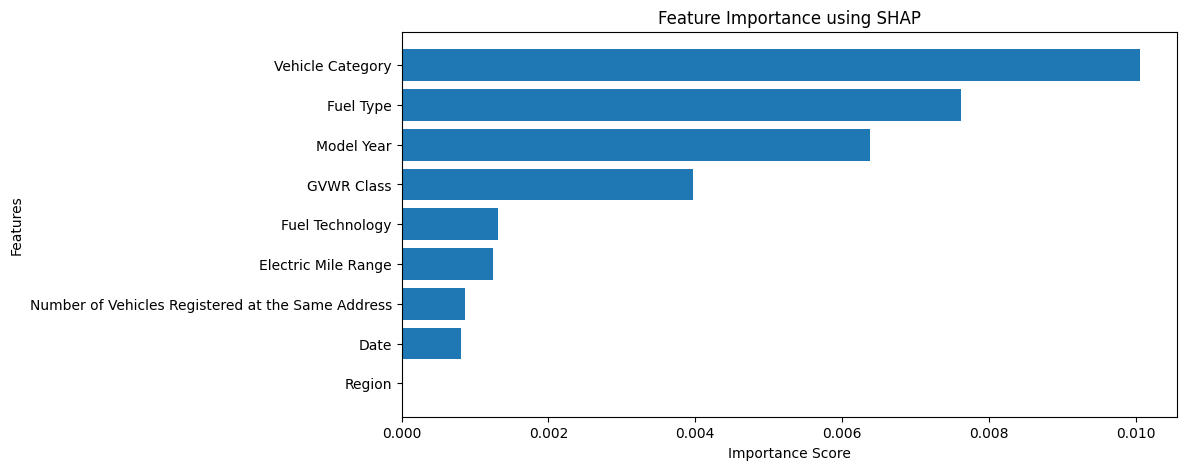

In [ ]:
# Print feature importance as a DataFrame
print(feature_importance)

# Plot feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance using SHAP')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()


<ipython-input-30-9258335cac32>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Model Year'].fillna(df['Model Year'].median(), inplace=True)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0088 - mae: 0.0645 - val_loss: 0.0022 - val_mae: 0.0228
Epoch 2/100
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0035 - mae: 0.0343 - val_loss: 0.0020 - val_mae: 0.0199
Epoch 3/100
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0025 - mae: 0.0270 - val_loss: 0.0019 - val_mae: 0.0187
Epoch 4/100
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0025 - mae: 0.0242 - val_loss: 0.0018 - val_mae: 0.0171
Epoch 5/100
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0021 - mae: 0.0215 - val_loss: 0.0017 - val_mae: 0.0165
Epoch 6/100
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0020 - mae: 0.0199 - val_loss: 0.0017 - val_mae: 0.0150
Epoch 7/100
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0017 - mae: 0.0183 - val_loss: 0.0016 - val_mae: 0.0139
Epoch 8/100
1027/1027 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0020 - mae: 0.0183 - val_loss: 0.0016 - val_mae: 0.0145
Epoch 9/100
1027/1027 ━━━━━━━━━━

ExactExplainer explainer: 32843it [09:13, 58.07it/s]


            Feature  Importance
0  Vehicle Category    0.008893
1         Fuel Type    0.008865
2        Model Year    0.005948
3        GVWR Class    0.004589


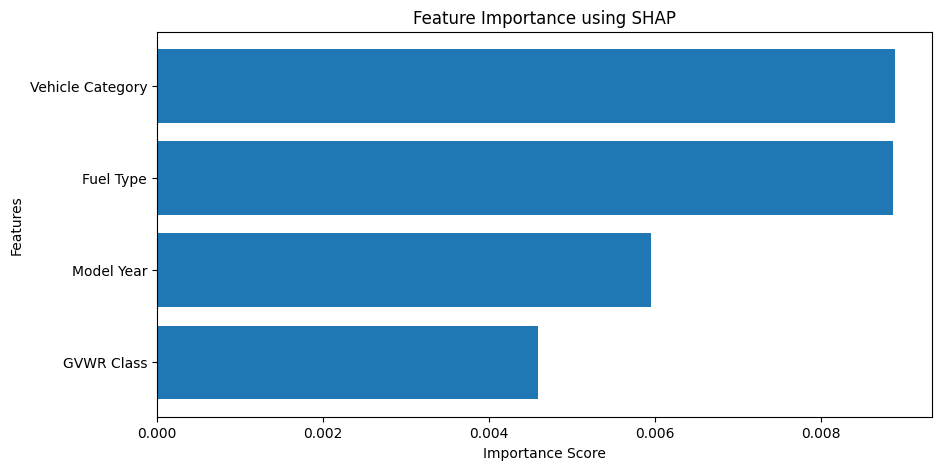

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import shap
import matplotlib.pyplot as plt

# Handle missing values
df['Model Year'].fillna(df['Model Year'].median(), inplace=True)

# Encode categorical variables
categorical_columns = ['Vehicle Category', 'Fuel Type', 'GVWR Class']
label_encoders = {}

for col in categorical_columns:
    df[col] = df[col].astype(str)
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Select only the most important features based on SHAP analysis
selected_features = ['Vehicle Category', 'Fuel Type', 'Model Year', 'GVWR Class']
X = df[selected_features]
y = df['Vehicle Population']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalize the target variable (y)
y_scaler = MinMaxScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Define an optimized Neural Network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Regression output
])

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Generate predictions
y_pred_scaled = model.predict(X_test)

# Convert predictions back to original scale
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_test_original = y_scaler.inverse_transform(y_test)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))

# Display RMSE
print(f"Optimized Model RMSE: {rmse}")

# Feature Importance using SHAP (avoiding ace_tools)
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)

# Convert SHAP values into a summary dataframe
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='Importance', ascending=False)

# Print feature importance
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance using SHAP')
plt.gca().invert_yaxis()  # Show most important feature on top
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Compute RMSE using actual vs predicted values
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))

# Display RMSE
print(f"Optimized Model RMSE: {rmse}")


Optimized Model RMSE: 12456.13237574469


In [ ]:
# Replace new unseen categories with 'Unknown' (or most frequent category)
for col in categorical_columns:
    if col in unseen_labels:
        most_frequent = df[col].mode()[0]  # Get most frequent category from training data
        scoring_df[col] = scoring_df[col].apply(lambda x: x if x in df[col].unique() else most_frequent)

# Convert categorical columns using the trained LabelEncoders
for col in categorical_columns:
    scoring_df[col] = scoring_df[col].astype(str)
    scoring_df[col] = label_encoders[col].transform(scoring_df[col])

# Select only the most important features
X_scoring = scoring_df[['Vehicle Category', 'Fuel Type', 'Model Year', 'GVWR Class']]

# Standardize features using the same scaler from training
X_scoring_scaled = scaler.transform(X_scoring)

# Generate predictions using the trained model
y_pred_scaled = model.predict(X_scoring_scaled)

# Convert predictions back to the original scale
y_pred = y_scaler.inverse_transform(y_pred_scaled)

# Add predictions to the scoring dataset
scoring_df['Predicted Vehicle Population'] = y_pred

# Save predictions to an Excel file for submission
submission_path = "/content/drive/MyDrive/2nd semester/submissios.xlsx"
scoring_df[['Predicted Vehicle Population']].to_excel(submission_path, index=False)

print(f"Final predictions saved as '{submission_path}'")


236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Final predictions saved as '/content/drive/MyDrive/2nd semester/submissios.xlsx'
